In [1]:
import re

In [2]:
def parse_log(lines):
    records = []
    current = {}
    for line in lines:
        run_match = re.match(r'Running (\w+)', line)
        if run_match:
            if 'case' in current:
                records.append(current)
            current = {'case': run_match.group(1)}
            continue

        mesh_match = re.search(r'Mesh loaded.* with (\d+) elements and (\d+) nodes', line)
        if mesh_match:
            current['elements'] = int(mesh_match.group(1))
            current['nodes'] = int(mesh_match.group(2))
            continue

        time_match = re.search(r'Total execution time: (\d+) ms', line)
        if time_match:
            current['time_ms'] = int(time_match.group(1))

    if 'case' in current:
        records.append(current)
    return records

In [3]:
def create_and_print_time(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()

    # Parse and separate cases
    records = parse_log(lines)
    q_cases = [r for r in records if r['case'].startswith('Q')]
    t_cases = [r for r in records if r['case'].startswith('T')]

    # Print results
    print('Q-prefixed cases:')
    for r in q_cases:
        print(f"  Case {r['case']}: Elements = {r['elements']}, Nodes = {r['nodes']}, Time = {r['time_ms']} ms")

    print('\nT-prefixed cases:')
    for r in t_cases:
        print(f"  Case {r['case']}: Elements = {r['elements']}, Nodes = {r['nodes']}, Time = {r['time_ms']} ms")

    return q_cases, t_cases

In [4]:
gpu_q_cases, gpu_t_cases = create_and_print_time('gpu.out')

Q-prefixed cases:
  Case Q20: Elements = 400, Nodes = 441, Time = 246 ms
  Case Q100: Elements = 10000, Nodes = 10201, Time = 260 ms
  Case Q500: Elements = 250000, Nodes = 251001, Time = 1097 ms
  Case Q1000: Elements = 1000000, Nodes = 1002001, Time = 3685 ms

T-prefixed cases:
  Case T20: Elements = 938, Nodes = 510, Time = 225 ms
  Case T100: Elements = 23250, Nodes = 11826, Time = 286 ms
  Case T500: Elements = 578286, Nodes = 290144, Time = 1717 ms
  Case T1000: Elements = 2310742, Nodes = 1157372, Time = 6192 ms


In [5]:
omp_q_cases, omp_t_cases = create_and_print_time('omp.out')

Q-prefixed cases:
  Case Q20: Elements = 400, Nodes = 441, Time = 6 ms
  Case Q100: Elements = 10000, Nodes = 10201, Time = 85 ms
  Case Q500: Elements = 250000, Nodes = 251001, Time = 2297 ms
  Case Q1000: Elements = 1000000, Nodes = 1002001, Time = 9275 ms

T-prefixed cases:
  Case T20: Elements = 938, Nodes = 510, Time = 8 ms
  Case T100: Elements = 23250, Nodes = 11826, Time = 273 ms
  Case T500: Elements = 578286, Nodes = 290144, Time = 2678 ms
  Case T1000: Elements = 2310742, Nodes = 1157372, Time = 11322 ms


In [6]:
serial_q_cases, serial_t_cases = create_and_print_time('serial.out')

Q-prefixed cases:
  Case Q20: Elements = 400, Nodes = 441, Time = 22 ms
  Case Q100: Elements = 10000, Nodes = 10201, Time = 78 ms
  Case Q500: Elements = 250000, Nodes = 251001, Time = 2295 ms
  Case Q1000: Elements = 1000000, Nodes = 1002001, Time = 9340 ms

T-prefixed cases:
  Case T20: Elements = 938, Nodes = 510, Time = 5 ms
  Case T100: Elements = 23250, Nodes = 11826, Time = 117 ms
  Case T500: Elements = 578286, Nodes = 290144, Time = 2579 ms
  Case T1000: Elements = 2310742, Nodes = 1157372, Time = 10964 ms


In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Plotting
def plot_cases(q_cases, t_cases, title):
    q_nodes = [r['nodes'] for r in q_cases]
    q_times = [r['time_ms'] for r in q_cases]
    t_nodes = [r['nodes'] for r in t_cases]
    t_times = [r['time_ms'] for r in t_cases]
    plt.figure(figsize=(10, 5))
    plt.plot(q_nodes, q_times, label='Quad Cases', marker='o')
    plt.plot(t_nodes, t_times, label='Tri Cases', marker='x')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Execution Time (ms)')

    # log log scale
    plt.xscale('log')
    plt.yscale('log')

    plt.title(title)

    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.show()

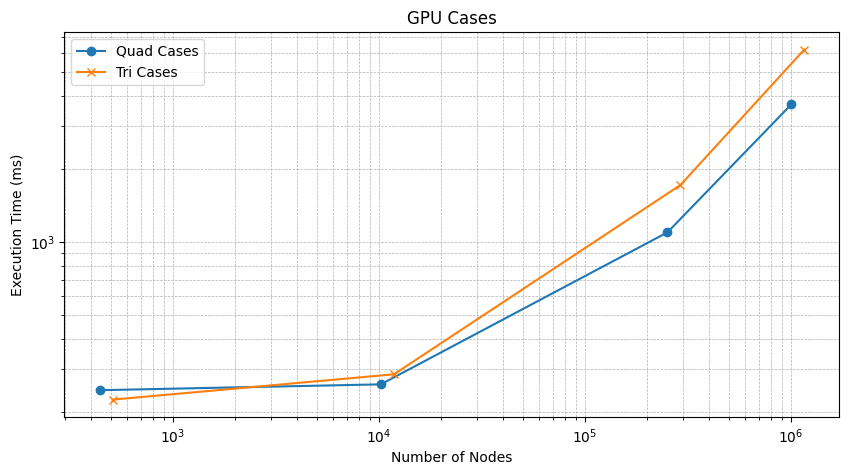

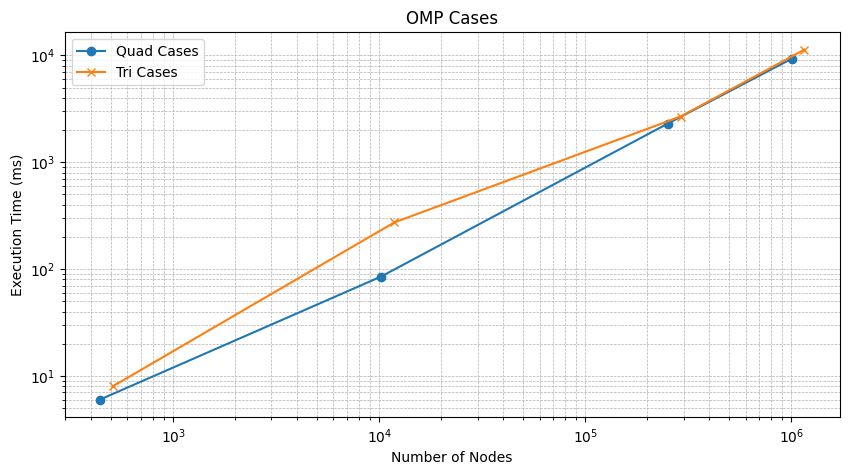

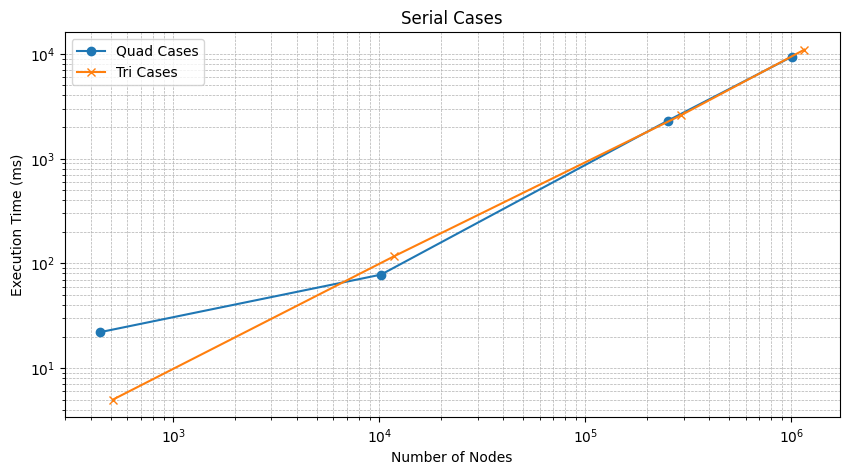

In [9]:
plot_cases(gpu_q_cases, gpu_t_cases, 'GPU Cases')
plot_cases(omp_q_cases, omp_t_cases, 'OMP Cases')
plot_cases(serial_q_cases, serial_t_cases, 'Serial Cases')

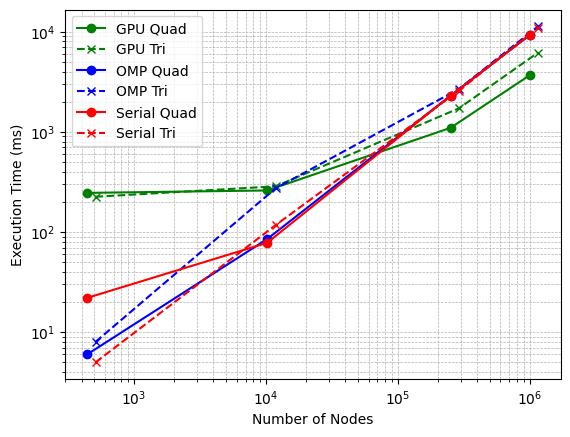

In [10]:
gpu_quad_time = [r['time_ms'] for r in gpu_q_cases]
gpu_tri_time = [r['time_ms'] for r in gpu_t_cases]
omp_quad_time = [r['time_ms'] for r in omp_q_cases]
omp_tri_time = [r['time_ms'] for r in omp_t_cases]
serial_quad_time = [r['time_ms'] for r in serial_q_cases]
serial_tri_time = [r['time_ms'] for r in serial_t_cases]

gpu_quad_nodes = [r['nodes'] for r in gpu_q_cases]
gpu_tri_nodes = [r['nodes'] for r in gpu_t_cases]
omp_quad_nodes = [r['nodes'] for r in omp_q_cases]
omp_tri_nodes = [r['nodes'] for r in omp_t_cases]
serial_quad_nodes = [r['nodes'] for r in serial_q_cases]
serial_tri_nodes = [r['nodes'] for r in serial_t_cases]


plt.plot(gpu_quad_nodes, gpu_quad_time, label='GPU Quad', marker='o', color='green', linestyle='-')
plt.plot(gpu_tri_nodes, gpu_tri_time, label='GPU Tri', marker='x', color='green', linestyle='--')
plt.plot(omp_quad_nodes, omp_quad_time, label='OMP Quad', marker='o', color='blue', linestyle='-')
plt.plot(omp_tri_nodes, omp_tri_time, label='OMP Tri', marker='x', color='blue', linestyle='--')
plt.plot(serial_quad_nodes, serial_quad_time, label='Serial Quad', marker='o', color='red', linestyle='-')
plt.plot(serial_tri_nodes, serial_tri_time, label='Serial Tri', marker='x', color='red', linestyle='--')

plt.xlabel('Number of Nodes')
plt.ylabel('Execution Time (ms)')
plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()